In [2]:
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report, roc_auc_score, accuracy_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [3]:
# Đường dẫn đến tệp của bạn
data = pd.read_csv("BankChurners.csv")

In [4]:
data

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.999910
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.999940
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.999980
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.999870
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.999980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,...,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462,0.000191,0.999810
10123,710638233,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,...,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511,0.995270,0.004729
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,...,5409.0,0,5409.0,0.819,10291,60,0.818,0.000,0.997880,0.002118
10125,717406983,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,...,5281.0,0,5281.0,0.535,8395,62,0.722,0.000,0.996710,0.003294


In [5]:
columns_to_drop = [
    'CLIENTNUM', 
    'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
    'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'
]
data_cleaned = data.drop(columns=columns_to_drop)
data_cleaned

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,3,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462
10123,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,4,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511
10124,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,5,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000
10125,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,4,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000


In [6]:
# Mã hóa biến mục tiêu
target = 'Attrition_Flag'
data_cleaned[target] = LabelEncoder().fit_transform(data_cleaned[target])

In [7]:
# Mã hóa các biến phân loại
categorical_columns = data_cleaned.select_dtypes(include=['object']).columns
data_encoded = pd.get_dummies(data_cleaned, columns=categorical_columns, drop_first=True)


In [8]:
# Tách dữ liệu
X = data_encoded.drop(columns=[target])
y = data_encoded[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [9]:
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)


In [10]:
print("Tỷ lệ nhãn trước SMOTE:", y_train.value_counts(normalize=True))
print("Tỷ lệ nhãn sau SMOTE:", pd.Series(y_train_resampled).value_counts(normalize=True))

Tỷ lệ nhãn trước SMOTE: Attrition_Flag
1    0.839279
0    0.160721
Name: proportion, dtype: float64
Tỷ lệ nhãn sau SMOTE: Attrition_Flag
0    0.5
1    0.5
Name: proportion, dtype: float64


In [11]:
# Chuẩn hóa dữ liệu
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [12]:
# Hiển thị ma trận tương quan
correlation_matrix = data_encoded.corr()

In [13]:
# Lọc ra sự tương quan giữa các đặc trưng và biến mục tiêu
correlation_with_target = correlation_matrix[target].sort_values(ascending=False)
print("\nTương quan giữa các trường và biến mục tiêu:")
print(correlation_with_target)


Tương quan giữa các trường và biến mục tiêu:
Attrition_Flag                    1.000000
Total_Trans_Ct                    0.371403
Total_Ct_Chng_Q4_Q1               0.290054
Total_Revolving_Bal               0.263053
Avg_Utilization_Ratio             0.178410
Total_Trans_Amt                   0.168598
Total_Relationship_Count          0.150005
Total_Amt_Chng_Q4_Q1              0.131063
Gender_M                          0.037272
Income_Category_$60K - $80K       0.028221
Credit_Limit                      0.023873
Marital_Status_Married            0.023735
Education_Level_High School       0.011730
Income_Category_$40K - $60K       0.011688
Education_Level_Graduate          0.009046
Card_Category_Silver              0.008467
Income_Category_$80K - $120K      0.003459
Education_Level_Uneducated        0.001444
Avg_Open_To_Buy                   0.000285
Card_Category_Gold               -0.005973
Income_Category_Unknown          -0.007179
Marital_Status_Unknown           -0.008904
Educatio

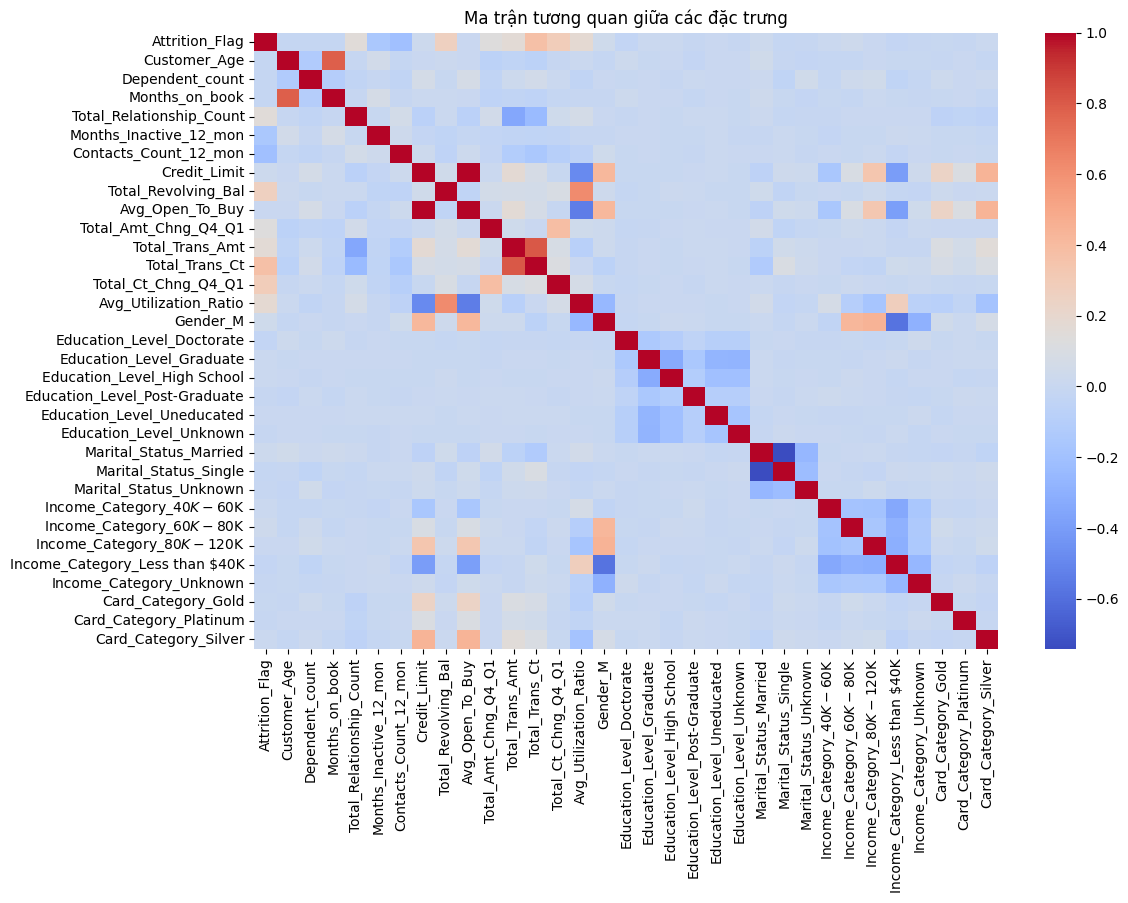

In [14]:
# Vẽ heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=False, cmap="coolwarm", cbar=True)
plt.title("Ma trận tương quan giữa các đặc trưng")
plt.show()

In [15]:
models = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'MLP Classifier': MLPClassifier(random_state=42, max_iter=500),
    'GaussianNB': GaussianNB(),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
}

In [16]:
model_accuracies = {}

for model_name, model in models.items():
    try:
        # Huấn luyện mô hình
        model.fit(X_train_scaled, y_train)

        # Dự đoán
        predictions = model.predict(X_test_scaled)
        probabilities = model.predict_proba(X_test_scaled)[:, 1]

        # Đánh giá
        accuracy = accuracy_score(y_test, predictions)
        report = classification_report(y_test, predictions, target_names=['Existing Customer', 'Attrited Customer'])
        auc_score = roc_auc_score(y_test, probabilities)

        # Lưu độ chính xác
        model_accuracies[model_name] = accuracy
        print(f"Model: {model_name}")
        print(report)
        print(f"AUC: {auc_score:.4f}")
        print(f"Accuracy: {accuracy:.4f}")
    except Exception as e:
        print(f"Lỗi với mô hình {model_name}: {e}")


Model: Random Forest
                   precision    recall  f1-score   support

Existing Customer       0.91      0.81      0.86       325
Attrited Customer       0.96      0.99      0.97      1701

         accuracy                           0.96      2026
        macro avg       0.94      0.90      0.92      2026
     weighted avg       0.96      0.96      0.96      2026

AUC: 0.9855
Accuracy: 0.9566
Model: Gradient Boosting
                   precision    recall  f1-score   support

Existing Customer       0.93      0.85      0.89       325
Attrited Customer       0.97      0.99      0.98      1701

         accuracy                           0.96      2026
        macro avg       0.95      0.92      0.93      2026
     weighted avg       0.96      0.96      0.96      2026

AUC: 0.9880
Accuracy: 0.9650


c:\Users\ducsa\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Model: MLP Classifier
                   precision    recall  f1-score   support

Existing Customer       0.78      0.79      0.78       325
Attrited Customer       0.96      0.96      0.96      1701

         accuracy                           0.93      2026
        macro avg       0.87      0.87      0.87      2026
     weighted avg       0.93      0.93      0.93      2026

AUC: 0.9574
Accuracy: 0.9304
Model: GaussianNB
                   precision    recall  f1-score   support

Existing Customer       0.64      0.60      0.62       325
Attrited Customer       0.93      0.94      0.93      1701

         accuracy                           0.88      2026
        macro avg       0.78      0.77      0.78      2026
     weighted avg       0.88      0.88      0.88      2026

AUC: 0.8554
Accuracy: 0.8820
Model: XGBoost
                   precision    recall  f1-score   support

Existing Customer       0.92      0.91      0.91       325
Attrited Customer       0.98      0.98      0.98      